## Questão 1 - Trabalho de Engenharia Econômica - Modelo CAPM

In [ ]:
#Instalando a API do Yahoo Queery
!pip install yahooquery

In [155]:
#Importando as Bibliotecas Necessárias
from yahooquery import Ticker
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [156]:
# Configurando o plot para ele sair em alta definição 
plt.rcParams['figure.dpi'] = 100

In [157]:
#Coletando os dados da B3 pela API do Yahoo Query
ibov = Ticker("^BVSP") #Dados do IBOVESPA
data_set_ibov = ibov.history(start="2022-03-14",end="2022-08-19")
itau = Ticker("ITUB4.SA") #Dados do Ativo ITUB4
data_set_itau = itau.history(start="2022-03-14",end="2022-08-19")

# Iremos fazer primeiramente o tratamento dos dados do data set do ativo ITUB4

In [158]:
#Vizualizando o data set do ativo
data_set_itau

low       high      volume       open      close  \
symbol   date                                                                 
ITUB4.SA 2022-03-14  25.010000  25.540001  32010100.0  25.020000  25.190001   
         2022-03-15  24.700001  25.440001  36823300.0  25.110001  25.100000   
         2022-03-16  25.139999  25.660000  40371600.0  25.350000  25.590000   
         2022-03-17  25.459999  26.190001  43343500.0  25.639999  26.150000   
         2022-03-18  26.070000  26.600000  64791300.0  26.090000  26.340000   
...                        ...        ...         ...        ...        ...   
         2022-08-15  26.340000  27.110001  36567300.0  26.340000  26.969999   
         2022-08-16  26.629999  27.350000  25689300.0  26.940001  27.280001   
         2022-08-17  27.000000  27.480000  25236800.0  27.080000  27.350000   
         2022-08-18  27.110001  27.520000  32701700.0  27.379999  27.270000   
         2022-08-19        NaN        NaN         NaN        NaN        NaN   

                      adjclose  dividends  
symbol   date                              
ITUB4.SA 2022-03-14  24.817787     0.0000  
         2022-03-15  24.729115     0.0000  
         2022-03-16  25.211874     0.0000  
         2022-03-17  25.763599     0.0000  
         2022-03-18  25.950794     0.0000  
...                        ...        ...  
         2022-08-15  26.666870     0.0000  
         2022-08-16  26.973389     0.0000  
         2022-08-17  27.042601     0.0000  
         2022-08-18  26.963501     0.0000  
         2022-08-19        NaN     0.3065  

[112 rows x 7 columns]

In [159]:
# Transformando todas as variáveis da tabela em colunas com o reset_index
data_set_itau.reset_index(inplace=True) # o comando inplace=True faz a substituição diretamente no dataframe original

In [139]:
#Vizualizando o data set 
data_set_itau

,symbol,date,low,open,close,volume,high,adjclose,dividends
0,ITUB4.SA,2022-03-14,25.010000,25.020000,25.190001,32010100.0,25.540001,24.817783,0.0000
1,ITUB4.SA,2022-03-15,24.700001,25.110001,25.100000,36823300.0,25.440001,24.729115,0.0000
2,ITUB4.SA,2022-03-16,25.139999,25.350000,25.590000,40371600.0,25.660000,25.211876,0.0000
3,ITUB4.SA,2022-03-17,25.459999,25.639999,26.150000,43343500.0,26.190001,25.763597,0.0000
4,ITUB4.SA,2022-03-18,26.070000,26.090000,26.340000,64791300.0,26.600000,25.950794,0.0000
...,...,...,...,...,...,...,...,...,...
107,ITUB4.SA,2022-08-15,26.340000,26.340000,26.969999,36567300.0,27.110001,26.666870,0.0000
108,ITUB4.SA,2022-08-16,26.629999,26.940001,27.280001,25689300.0,27.350000,26.973389,0.0000
109,ITUB4.SA,2022-08-17,27.000000,27.080000,27.350000,25236800.0,27.480000,27.042601,0.0000
110,ITUB4.SA,2022-08-18,27.110001,27.379999,27.270000,32701700.0,27.520000,26.963501,0.0000


In [160]:
#Removendo as colunas que não iremos usar para a análise
data_set_itau = data_set_itau.drop(['volume', 'open','high','low','adjclose','dividends'], axis=1)

In [161]:
#Vizualizando o dataset 
data_set_itau

,symbol,date,close
0,ITUB4.SA,2022-03-14,25.190001
1,ITUB4.SA,2022-03-15,25.100000
2,ITUB4.SA,2022-03-16,25.590000
3,ITUB4.SA,2022-03-17,26.150000
4,ITUB4.SA,2022-03-18,26.340000
...,...,...,...
107,ITUB4.SA,2022-08-15,26.969999
108,ITUB4.SA,2022-08-16,27.280001
109,ITUB4.SA,2022-08-17,27.350000
110,ITUB4.SA,2022-08-18,27.270000


# Agora iremos fazer o mesmo tratamento para o IBOVESPA

In [162]:
#Vizualizando o data set do ativo
data_set_ibov

low      open      high     close    volume  adjclose
symbol date                                                                  
^BVSP  2022-03-14  109717.0  111716.0  112299.0  109928.0  10480900  109928.0
       2022-03-15  107781.0  109925.0  109925.0  108959.0  13653800  108959.0
       2022-03-16  108958.0  108958.0  111183.0  111112.0  13205200  111112.0
       2022-03-17  111070.0  111113.0  113088.0  113076.0  14407500  113076.0
       2022-03-18  112475.0  113076.0  115311.0  115311.0  19552500  115311.0
...                     ...       ...       ...       ...       ...       ...
       2022-08-12  109718.0  109718.0  112764.0  112764.0  18704900  112764.0
       2022-08-15  111067.0  112767.0  113214.0  113032.0  15552900  113032.0
       2022-08-16  112690.0  113034.0  113626.0  113512.0  12986400  113512.0
       2022-08-17  112483.0  113508.0  114146.0  113708.0  14652800  113708.0
       2022-08-18  113304.0  113708.0  114375.0  113813.0  10644200  113813.0

[111 rows x 6 columns]

In [163]:
# Transformando todas as variáveis da tabela em colunas com o reset_index
data_set_ibov.reset_index(inplace=True) # o comando inplace=True faz a substituição diretamente no dataframe original

In [164]:
#Vizualizando o dataset
data_set_ibov

,symbol,date,low,open,high,close,volume,adjclose
0,^BVSP,2022-03-14,109717.0,111716.0,112299.0,109928.0,10480900,109928.0
1,^BVSP,2022-03-15,107781.0,109925.0,109925.0,108959.0,13653800,108959.0
2,^BVSP,2022-03-16,108958.0,108958.0,111183.0,111112.0,13205200,111112.0
3,^BVSP,2022-03-17,111070.0,111113.0,113088.0,113076.0,14407500,113076.0
4,^BVSP,2022-03-18,112475.0,113076.0,115311.0,115311.0,19552500,115311.0
...,...,...,...,...,...,...,...,...
106,^BVSP,2022-08-12,109718.0,109718.0,112764.0,112764.0,18704900,112764.0
107,^BVSP,2022-08-15,111067.0,112767.0,113214.0,113032.0,15552900,113032.0
108,^BVSP,2022-08-16,112690.0,113034.0,113626.0,113512.0,12986400,113512.0
109,^BVSP,2022-08-17,112483.0,113508.0,114146.0,113708.0,14652800,113708.0


In [165]:
# Removendo as colunas desnecessárias para a análise
data_set_ibov = data_set_ibov.drop(['volume', 'open','high','low','adjclose'], axis=1)

In [166]:
#Vizualizando o dataset
data_set_ibov

,symbol,date,close
0,^BVSP,2022-03-14,109928.0
1,^BVSP,2022-03-15,108959.0
2,^BVSP,2022-03-16,111112.0
3,^BVSP,2022-03-17,113076.0
4,^BVSP,2022-03-18,115311.0
...,...,...,...
106,^BVSP,2022-08-12,112764.0
107,^BVSP,2022-08-15,113032.0
108,^BVSP,2022-08-16,113512.0
109,^BVSP,2022-08-17,113708.0


# item a) Calcule os retornos contínuos do ativo selecionado, ITUB4, e do IBOVESPA. Usando a seguinte expressão

\begin{equation}
R_{continuo} = ln\left(\frac{P_t}{P_{t-1}}\right)
\end{equation}

Em que $P_t$ é o valor corrente do ativo e $P_{t-1}$ é o valor base do ativo

In [167]:
#Cálculo dos retornos continuos para o ativo ITUB4
valor_corrente_itau = data_set_itau['close']
valor_base_itau = valor_corrente_itau.shift(1)
data_set_itau['Retornos Continuos'] = np.log(valor_corrente_itau/valor_base_itau)

In [168]:
#Cálculo dos retornos continuos para o IBOVESPA
valor_corrente_ibov = data_set_ibov['close']
valor_base_ibov = valor_corrente_ibov.shift(1)
data_set_ibov['Retornos Continuos'] = np.log(valor_corrente_ibov/valor_base_ibov)

In [169]:
#Vizualizando o data set do ativo
data_set_itau

,symbol,date,close,Retornos Continuos
0,ITUB4.SA,2022-03-14,25.190001,NaN
1,ITUB4.SA,2022-03-15,25.100000,-0.003579
2,ITUB4.SA,2022-03-16,25.590000,0.019334
3,ITUB4.SA,2022-03-17,26.150000,0.021648
4,ITUB4.SA,2022-03-18,26.340000,0.007240
...,...,...,...,...
107,ITUB4.SA,2022-08-15,26.969999,0.008565
108,ITUB4.SA,2022-08-16,27.280001,0.011429
109,ITUB4.SA,2022-08-17,27.350000,0.002563
110,ITUB4.SA,2022-08-18,27.270000,-0.002929


In [170]:
#Vizualizando o data set do IBOVESPA
data_set_ibov

,symbol,date,close,Retornos Continuos
0,^BVSP,2022-03-14,109928.0,NaN
1,^BVSP,2022-03-15,108959.0,-0.008854
2,^BVSP,2022-03-16,111112.0,0.019567
3,^BVSP,2022-03-17,113076.0,0.017521
4,^BVSP,2022-03-18,115311.0,0.019573
...,...,...,...,...
106,^BVSP,2022-08-12,112764.0,0.027384
107,^BVSP,2022-08-15,113032.0,0.002374
108,^BVSP,2022-08-16,113512.0,0.004238
109,^BVSP,2022-08-17,113708.0,0.001725


In [171]:
#Como temos valores Not a Number (NaN) no nossos datasets, iremos retira-los
data_set_itau_limpo = data_set_itau.dropna()
data_set_ibov_limpo = data_set_ibov.dropna()

In [172]:
#Vizualizando o dataset limpo do ativo 
data_set_itau_limpo

,symbol,date,close,Retornos Continuos
1,ITUB4.SA,2022-03-15,25.100000,-0.003579
2,ITUB4.SA,2022-03-16,25.590000,0.019334
3,ITUB4.SA,2022-03-17,26.150000,0.021648
4,ITUB4.SA,2022-03-18,26.340000,0.007240
5,ITUB4.SA,2022-03-21,26.990000,0.024378
...,...,...,...,...
106,ITUB4.SA,2022-08-12,26.740000,0.012039
107,ITUB4.SA,2022-08-15,26.969999,0.008565
108,ITUB4.SA,2022-08-16,27.280001,0.011429
109,ITUB4.SA,2022-08-17,27.350000,0.002563


In [173]:
#Vizualizando o dataset limpo do IBOV
data_set_ibov_limpo

,symbol,date,close,Retornos Continuos
1,^BVSP,2022-03-15,108959.0,-0.008854
2,^BVSP,2022-03-16,111112.0,0.019567
3,^BVSP,2022-03-17,113076.0,0.017521
4,^BVSP,2022-03-18,115311.0,0.019573
5,^BVSP,2022-03-21,116155.0,0.007293
...,...,...,...,...
106,^BVSP,2022-08-12,112764.0,0.027384
107,^BVSP,2022-08-15,113032.0,0.002374
108,^BVSP,2022-08-16,113512.0,0.004238
109,^BVSP,2022-08-17,113708.0,0.001725


# item b) Encontre a regressão tendo como eixo Y os retornos continuos do ativo (ITUB4) e X os retornos continuos do IBOVESPA

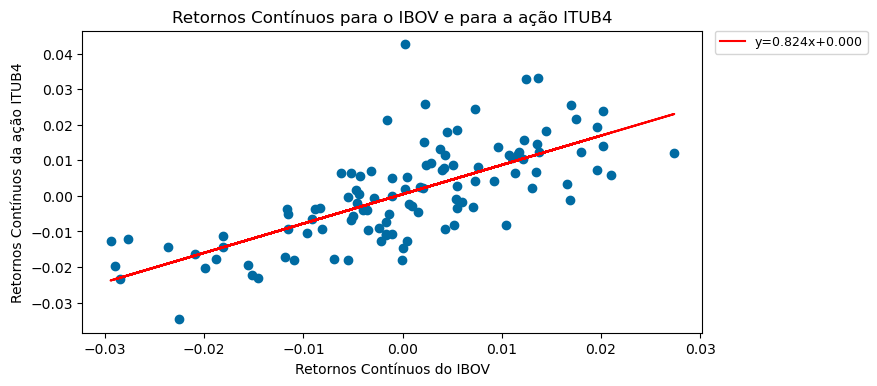

In [176]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(data_set_ibov_limpo['Retornos Continuos'],
            data_set_itau_limpo['Retornos Continuos'],
            color = '#006BA2') #Cor azul
ax.set_ylabel("Retornos Contínuos da ação ITUB4")
ax.set_xlabel("Retornos Contínuos do IBOV")
plt.title("Retornos Contínuos para o IBOV e para a ação ITUB4", loc='center')   
#Fazendo a regressão 
y = data_set_itau_limpo['Retornos Continuos']
x = data_set_ibov_limpo['Retornos Continuos']
regressao_ibov_itau = slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'red', label='y={:.3f}x+{:.3f}'.format(slope,intercept))
plt.legend(fontsize=9,loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.show() 

# item c) Calcule o $\beta$ da regressão

In [179]:
#Podemos calcular o Beta usando o método dos Mínimos Quadrados Ordinários
y = data_set_itau_limpo['Retornos Continuos'].tolist()
x = data_set_ibov_limpo['Retornos Continuos'].tolist()
# Adicionando o termo constante 
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     110.6
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           3.07e-18
Time:                        23:13:21   Log-Likelihood:                 353.82
No. Observations:                 110   AIC:                            -703.6
Df Residuals:                     108   BIC:                            -698.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.494      0.6

# Assim o nosso $\beta$ é igual a $0,8240$. Como já havia sido indicado no gráfico também pela legenda

# item d) Calcule o CAPM com o $\beta$ da regressão e retorno do ativo livre de risco pela taxa Selic, na maioria do período, de $3\%$ ao ano. Usar o Retorno médio do mercado pela média, diária, do Retorno do IBOVESPA no período considerado (lembrar de compatibilizar as taxas e depois transformar todas as taxas em taxas anuais – Exemplo de Regressão da Aula 8 nas Aulas de Revisão Estatística).

O modelo CAPM é dado por 
\begin{equation}
E(R_{ativo}) = R_{f} + \beta(E(R_{mercado}) - R_{f})
\end{equation}

Em que $E(R_{ativo})$ é retorno esperado do ativo, $R_{f}$ é o retorno do ativo livre de risco, nesse caso a Taxa SELIC, $\beta$ é o coeficiente da regressão calculado previamente e $E(R_{mercado})$ é o retorno esperado de mercado. 

In [182]:
#Primeiramente, com os dados que temos, iremos calcular o retorno médio do IBOVESPA diário e depois convertemos para valores anuais 
R_mercado_diario = np.mean(data_set_ibov_limpo['Retornos Continuos'])
R_mercado_anual = np.power(1 + R_mercado_diario,365-1) #Conversão para anual

In [183]:
# Cálculo do CAPM 
#Definindo as variáveis 
R_f = 0.03 
beta = 0.8240
Retorno_Esperado_Itau = R_f + beta*(R_mercado_anual - R_f)
print("O Retorno Esperado do Ativo escolhido, pelo CAPM, é:",Retorno_Esperado_Itau)


O Retorno Esperado do Ativo escolhido, pelo CAPM, é: 0.9296208649584982
